In [9]:
from list_change import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset
import os
import tensorflow as tf

In [1]:
import tensorflow as tf
# tf.config.list_physical_devices('GPU')
# print(tf.__version__)
tf.test.is_gpu_available()

2024-08-11 04:40:04.552972: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-11 04:40:04.553685: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 04:40:04.556360: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-11 04:40:04.562856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 04:40:04.573682: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


I0000 00:00:1723376405.818158   44362 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-11 04:40:05.824280: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


False

In [106]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [107]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [108]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [109]:
len(data)

24

In [110]:
data[0]

array([[[  25., -353.],
        [  87., -388.],
        [ 162., -464.]],

       [[  -5., -352.],
        [ -64., -345.],
        [ 116., -441.]],

       [[  23., -335.],
        [ -46., -315.],
        [  62., -425.]],

       [[  19., -334.],
        [ -27., -300.],
        [  70., -409.]],

       [[  -6., -326.],
        [-102., -307.],
        [ 113., -433.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]],

       [[ 114., -370.],
        [ 172., -452.],
        [ 170., -468.]]])

In [111]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [112]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.delete(X, -1, axis=1)
Y = np.delete(Y, 0, axis=1)

In [113]:
Y.shape

(24, 6, 3, 2)

In [114]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
X_test, Y_test = formating(X_test, Y_test)

In [115]:
X_test.shape

(30, 3, 2)

In [116]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[2], X.shape[3])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# history = model.fit(X, Y, epochs=100, batch_size=72, validation_data=(X, Y), verbose=1, shuffle=False)
for epoch in range(200):
    for x, y in zip(X, Y):
        loss = model.train_on_batch(x, y)
        l.append(loss)
    l0.append(model.evaluate(X_test, Y_test))

1/1 [==============================] - 0s 15ms/step - loss: 4191.2007


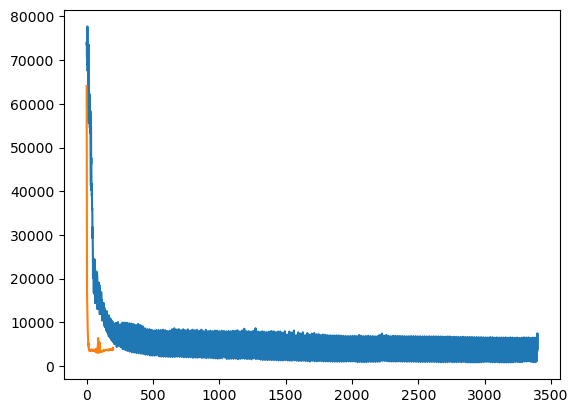

In [117]:
plt.plot(l)
plt.plot(l0)
plt.show()

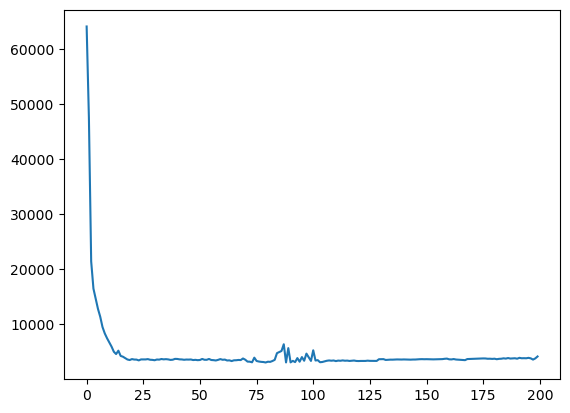

In [118]:
plt.plot(l0)

In [121]:
min(l0)

3101.8427734375

In [119]:

# model.evaluate(x,y)

In [120]:
# model = Sequential()
# model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(data.shape()[1], data.shape[2])))